In [1]:
import pickle, pandas

Using TensorFlow backend.


In [2]:
def load(fname):
    with open(fname, mode="rb") as f:
        return pickle.load(f)

In [83]:
topic_results = load('topic_results.pkl')
topic_results.keys()

dict_keys(['df', 'top_words', 'lda', 'doc_topic_mat'])

In [107]:
import datetime

def normalize_date(s):
    s = s.split(' ')[0].split('-')
    year = int(s[0])
    month = int(s[1])
    day = int(s[2])
    return pandas.Timestamp(year, month, day)

df = topic_results['df'].assign(CreatedTime = topic_results['df']['CreatedTime'].apply(normalize_date))
df = df.set_index('CreatedTime')
topic_cols = [e for e in df.columns.tolist() if e[:13]=='topic_weight_']
weekly_sums = df.resample('W')[topic_cols].sum()
weekly_counts = df.resample('W')[topic_cols].count()
weekly_vals = weekly_sums/weekly_counts

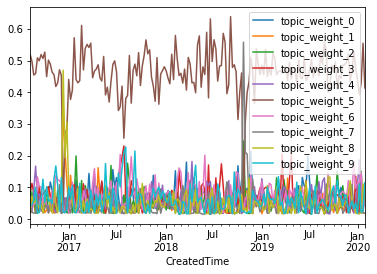

In [109]:
weekly_vals.plot()

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

def topic_wordcloud(topic_idx):
    # Start with one review:
    # Create and generate a word cloud image:
    words = topic_results['top_words'][topic_idx]

    wordcloud = WordCloud().generate(' '.join(words))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

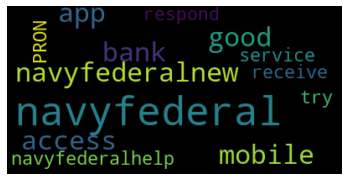

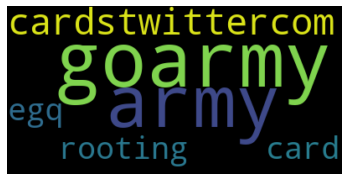

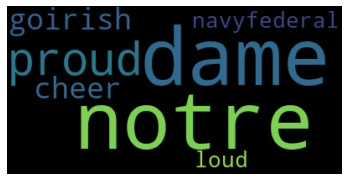

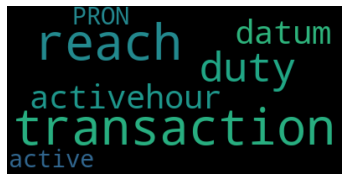

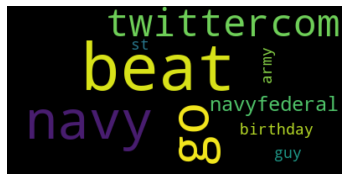

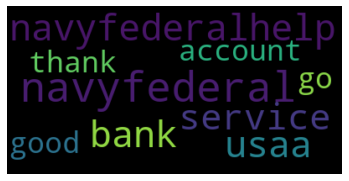

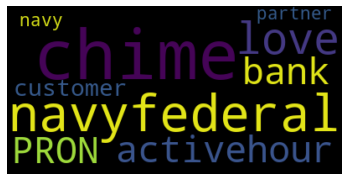

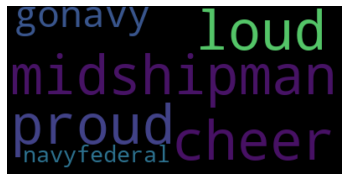

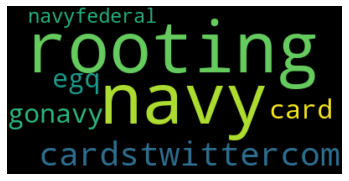

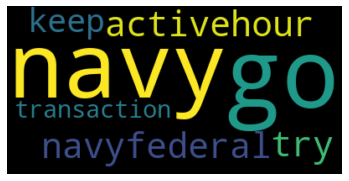

In [122]:
for i in range(len(topic_results['top_words'])):
    topic_wordcloud(i)